# CMF_Coursework 

## NETFLIX (NFLX)

### Importing Of Data

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [6]:
initial_data = yf.download("NFLX ^VIX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  2 of 2 completed


In [7]:
initial_data.head()

Adj Close                  Close                   High  \
                  NFLX       ^VIX        NFLX       ^VIX        NFLX   
Date                                                                   
2020-09-30  500.029999  26.370001  500.029999  26.370001  504.630005   
2020-10-01  527.510010  26.700001  527.510010  26.700001  529.549988   
2020-10-02  503.059998  27.629999  503.059998  27.629999  526.369995   
2020-10-05  520.650024  27.959999  520.650024  27.959999  520.989990   
2020-10-06  505.869995  29.480000  505.869995  29.480000  521.820007   

                              Low                   Open              Volume  \
                 ^VIX        NFLX       ^VIX        NFLX       ^VIX     NFLX   
Date                                                                           
2020-09-30  27.120001  489.269989  25.059999  492.570007  26.690001  4634100   
2020-10-01  27.110001  503.600006  25.330000  506.029999  25.780001  8153700   
2020-10-02  29.900000  502.700012  26.930000  516.429993  28.870001  6071200   
2020-10-05  29.690001  501.700012  27.270000  506.799988  29.520000  4088100   
2020-10-06  30.000000  504.160004  26.010000  518.719971  28.049999  4199000   

                 
           ^VIX  
Date             
2020-09-30    0  
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0

In [8]:
initial_data.tail()

Adj Close                  Close                   High  \
                  NFLX       ^VIX        NFLX       ^VIX        NFLX   
Date                                                                   
2021-09-24  592.390015  17.750000  592.390015  17.750000  592.979980   
2021-09-27  592.640015  18.760000  592.640015  18.760000  593.580017   
2021-09-28  583.849976  23.250000  583.849976  23.250000  599.539978   
2021-09-29  599.059998  22.559999  599.059998  22.559999  609.880005   
2021-09-30  610.340027  23.139999  610.340027  23.139999  619.000000   

                              Low                   Open              Volume  \
                 ^VIX        NFLX       ^VIX        NFLX       ^VIX     NFLX   
Date                                                                           
2021-09-24  20.410000  583.640015  17.629999  592.500000  19.330000  2126200   
2021-09-27  19.320000  576.929993  17.740000  587.950012  17.780001  2504700   
2021-09-28  24.820000  580.159973  19.709999  589.000000  19.740000  4431100   
2021-09-29  23.790001  588.010010  21.450001  589.010010  22.070000  6221000   
2021-09-30  24.709999  608.049988  20.600000  608.049988  21.480000  6612600   

                 
           ^VIX  
Date             
2021-09-24    0  
2021-09-27    0  
2021-09-28    0  
2021-09-29    0  
2021-09-30    0

In [9]:
initial_data['Adj Close'].head()

,NFLX,^VIX
Date,,
2020-09-30,500.029999,26.370001
2020-10-01,527.510010,26.700001
2020-10-02,503.059998,27.629999
2020-10-05,520.650024,27.959999
2020-10-06,505.869995,29.480000


In [10]:
initial_data['Adj Close'].tail()

,NFLX,^VIX
Date,,
2021-09-24,592.390015,17.750000
2021-09-27,592.640015,18.760000
2021-09-28,583.849976,23.250000
2021-09-29,599.059998,22.559999
2021-09-30,610.340027,23.139999


In [11]:
data =  initial_data['Adj Close']
nflx= data['NFLX']
vix= data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NFLX    253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [12]:
data.head()

,NFLX,^VIX
Date,,
2020-09-30,500.029999,26.370001
2020-10-01,527.510010,26.700001
2020-10-02,503.059998,27.629999
2020-10-05,520.650024,27.959999
2020-10-06,505.869995,29.480000


In [13]:
data.tail()

,NFLX,^VIX
Date,,
2021-09-24,592.390015,17.750000
2021-09-27,592.640015,18.760000
2021-09-28,583.849976,23.250000
2021-09-29,599.059998,22.559999
2021-09-30,610.340027,23.139999


### Calculating Implied Voltality and Plotting

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

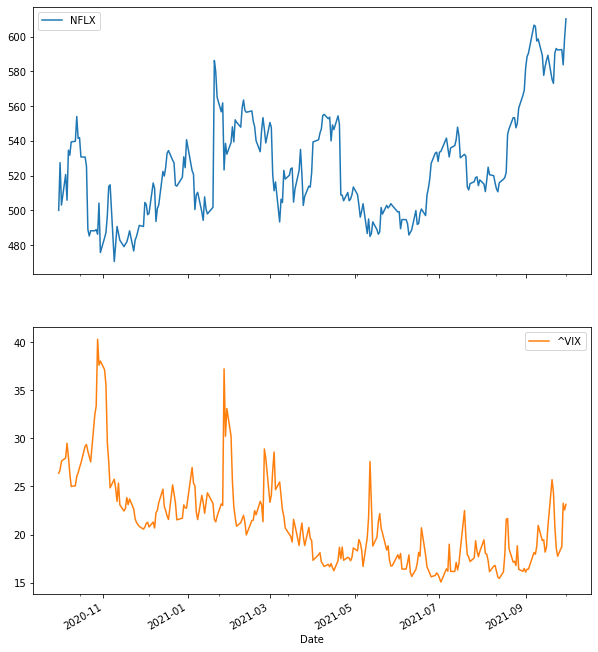

In [15]:
data.plot(figsize=(10, 12), subplots=True)

In [20]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,NFLX,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0535,0.0124
2020-10-02,-0.0475,0.0342
2020-10-05,0.0344,0.0119
2020-10-06,-0.0288,0.0529


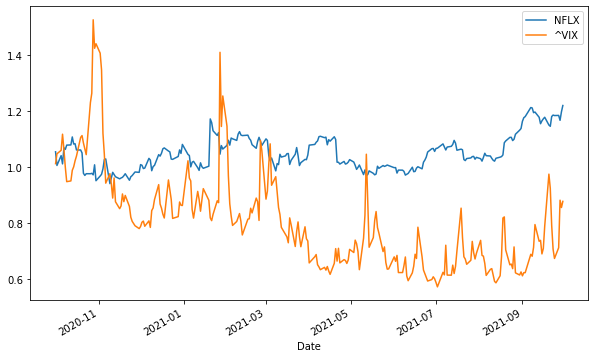

In [21]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [32]:
log_return = np.log(nflx / nflx.shift(1))

In [34]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 34.87 %


In [35]:
vix= vix[-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


### Rolling Satistics

In [36]:
sym = 'NFLX'
NFLX_data = pd.DataFrame(data[sym]).dropna()
NFLX_data.tail()

,NFLX
Date,
2021-09-24,592.390015
2021-09-27,592.640015
2021-09-28,583.849976
2021-09-29,599.059998
2021-09-30,610.340027


In [37]:
window = 10
NFLX_data['min'] = data[sym].rolling(window=window).min()
NFLX_data['mean'] = data[sym].rolling(window=window).mean()
NFLX_data['std'] = data[sym].rolling(window=window).std()
NFLX_data['median'] = data[sym].rolling(window=window).median()
NFLX_data['max'] = data[sym].rolling(window=window).max()
NFLX_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
NFLX_data.dropna().head()

,NFLX,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-13,554.090027,500.029999,525.691000,17.965299,529.649994,554.090027,550.363310
2020-10-14,541.450012,503.059998,529.833002,16.066063,533.224976,554.090027,543.678335
2020-10-15,541.940002,503.059998,531.276001,16.477008,537.049988,554.090027,542.374586
2020-10-16,530.789978,505.869995,534.048999,13.210367,537.049988,554.090027,533.686130
2020-10-19,530.719971,505.869995,535.055994,12.436656,537.049988,554.090027,531.461510


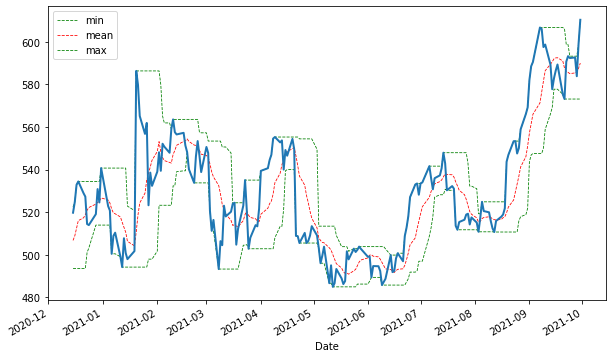

In [38]:
ax = NFLX_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [39]:
NFLX_data['SMA1'] = data[sym].rolling(window=20).mean()
NFLX_data['SMA2'] = data[sym].rolling(window=60).mean()
NFLX_data[[sym, 'SMA1', 'SMA2']].tail()

,NFLX,SMA1,SMA2
Date,,,
2021-09-24,592.390015,585.754999,547.235999
2021-09-27,592.640015,587.441000,548.220999
2021-09-28,583.849976,588.324500,549.052166
2021-09-29,599.059998,589.817999,550.009165
2021-09-30,610.340027,591.231500,551.248832


<AxesSubplot:xlabel='Date'>

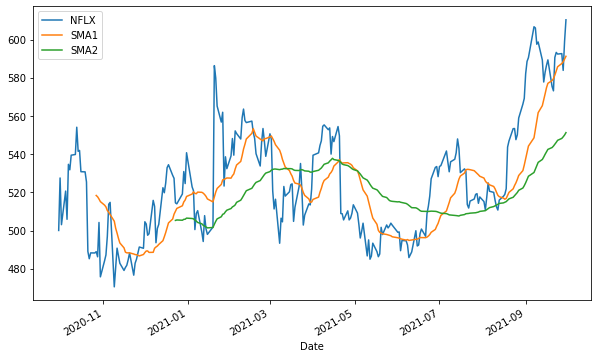

In [26]:
NFLX_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

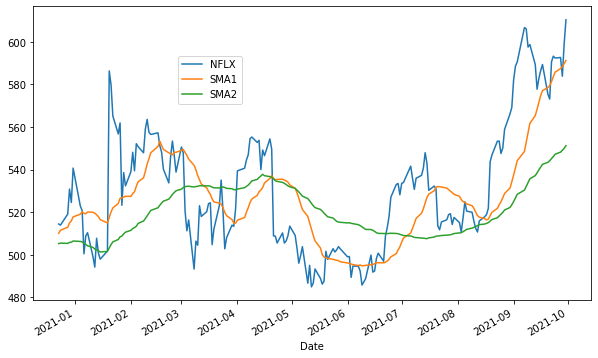

In [27]:
NFLX_data.dropna(inplace=True)
NFLX_data['positions'] = np.where(NFLX_data['SMA1'] > NFLX_data['SMA2'],1,-1)
ax = NFLX_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Two Methods: 

#### Binomial Tree

In [57]:
nflx[-1]

610.3400268554688

In [58]:
S0 = nflx[-1]              # spot stock price
K = 610             # strike
T = 1.0                 # maturity 
r = 0.0168                # risk free rate 
sig = 0.3487               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [59]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u    

In [60]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [61]:
S

array([[ 610.34002686,  746.45718559,  912.93099814, 1116.53156196],
       [   0.        ,  499.04395801,  610.34002686,  746.45718559],
       [   0.        ,    0.        ,  408.04283034,  499.04395801],
       [   0.        ,    0.        ,    0.        ,  333.63584253]])

In [62]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4636921078903288

In [63]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        , 506.53156196],
       [  0.        ,   0.        ,   0.        , 136.45718559],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [35]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 96.07810105, 174.80948753, 306.33745117, 506.53156196],
       [  0.        ,  29.01293867,  62.92077524, 136.45718559],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [36]:
print('American ' + payoff, str( V[0,0]))

American call 96.07810104850049


#### Monte Carlo Sim

In [37]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [50]:
T = 1
r = 0.0168
sigma = 0.3487
S0 = 610.34
K = 600

In [51]:
S = mcs_simulation_np(10000)

In [52]:
S = np.transpose(S)
S

array([[ 610.34      ,  612.12442332,  613.29437149, ...,  668.07785053,
         671.64036502,  666.7238928 ],
       [ 610.34      ,  610.67551319,  611.63069167, ..., 1134.43713717,
        1139.72520552, 1143.11122132],
       [ 610.34      ,  612.34327805,  613.28296962, ...,  556.16720326,
         554.6919231 ,  554.95366534],
       ...,
       [ 610.34      ,  614.22427821,  612.74137313, ...,  440.4688138 ,
         440.83935041,  446.05290716],
       [ 610.34      ,  610.3462058 ,  610.57466752, ...,  618.92594856,
         619.90438442,  618.90267127],
       [ 610.34      ,  609.09953847,  610.50851326, ...,  692.16824364,
         689.23016359,  689.04825292]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

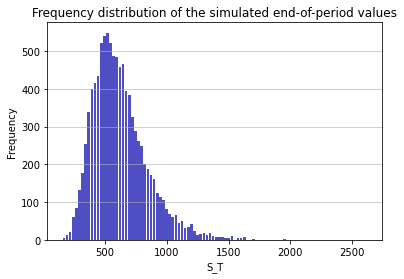

In [53]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [54]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('American call', str(c))

American call 95.17901998581512


In [55]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('American put', str(p))

American put 73.6489195990406


## Analysis

### Greeks Method

#### Option Value

In [59]:
def american_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [79]:
american_option_bsm(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

93.62541554337867

In [80]:
american_option_bsm(610.34, 600, 1, 0.0168, 0, 0.3487, 'put')

73.28961536499133

In [111]:
S = np.linspace(1,1000,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = american_option_bsm(S[i], 600, 1, 0.0168, 0, 0.3487, 'call')
    Put [i] = american_option_bsm(S[i], 600, 1, 0.0168, 0, 0.3487, 'put')

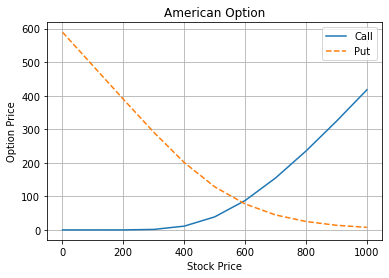

In [112]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('American Option')
plt.legend(['Call','Put'])

#### DELTA

In [87]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [89]:
delta(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

0.6070081284103668

In [96]:
delta(610.34, 600, 1, 0.0168, 0, 0.34, 'put')

-0.39370851519164574

In [109]:
S = np.linspace(1,1000,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 600, 1, 0.0168, 0, 0.3487, 'call')
    Delta_Put [i] = delta(S[i], 600, 1, 0.0168, 0, 0.3487, 'put')

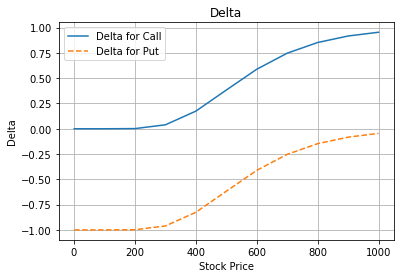

In [110]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

#### GAMMA

In [99]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [103]:
gamma(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

0.0018066598116342847

In [104]:
gamma(610.34, 600, 1, 0.0168, 0, 0.3487, 'put')

0.0018066598116342847

In [332]:
S = np.linspace(200,1000,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 600, 1, 0.0168, 0, 0.3487, 'call')

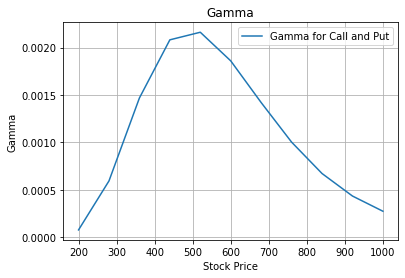

In [333]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

#### SPEED

In [107]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [120]:
speed(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

-5.265081357460723e-06

In [121]:
speed(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

-5.265081357460723e-06

In [336]:
S = np.linspace(200,1000,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 600, 1, 0.0168, 0, 0.3487, 'call')


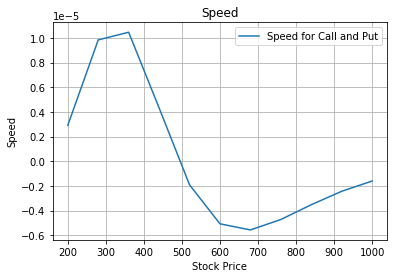

In [337]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

#### THETA

In [184]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [187]:
theta(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

45.567253018873984

In [188]:
theta(610.34, 600, 1, 0.0168, 0, 0.3487, 'put')

46.17696447737676

In [233]:
T = np.linspace(3.0,50,10)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(610.34, 600, T[i], 0.0168, 0, 0.3487, 'call')
    Theta_Put [i] = theta(610.34, 600, T[i], 0.0168, 0, 0.3487, 'put')

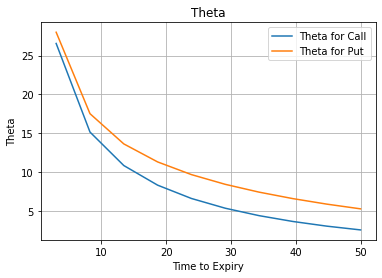

In [234]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

#### RHO

In [183]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [171]:
rho(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

276.85592555060464

In [172]:
rho(610.34, 600, 1, 0.0168, 0, 0.3487, 'put')

-313.14827427100806

In [237]:
r = np.linspace(0,0.2,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(610.34, 600, 1, r[i], 0, 0.3487, 'call')
    Rho_Put [i] = rho(610.34, 600, 1, r[i], 0, 0.3487, 'put')

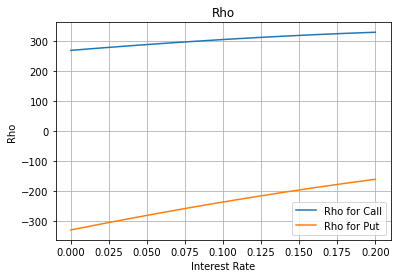

In [238]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

#### VEGA

In [128]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [129]:
vega(610.34, 600, 1, 0.0168, 0, 0.3487, 'call')

234.67779449167665

In [130]:
vega(610.34, 600, 1, 0.0168, 0, 0.3487, 'put')

234.67779449167665

In [273]:
vol = np.linspace(0.90,0.70,8)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(610.34, 600, 1, 0.0168, 0.3487, vol[i], 'call')

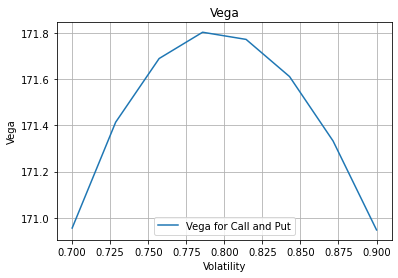

In [274]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

### 3D GRAPH

#### Surface Of Delta

In [275]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [280]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 600, T[i], 0.0168, 0, 0.3487, 'call')

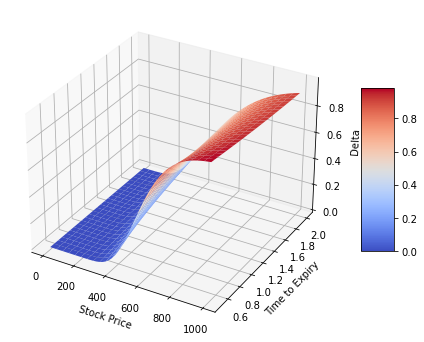

In [281]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Surface Of Gamma

In [ ]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [342]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 600, T[i], 0.0168, 0, 0.3487, 'call')

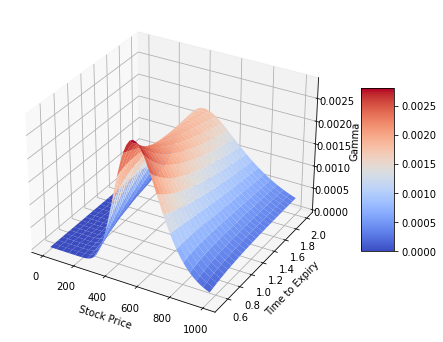

In [343]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Surface Of Speed

In [344]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [347]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 600, T[i], 0.0168, 0, 0.3487, 'call')

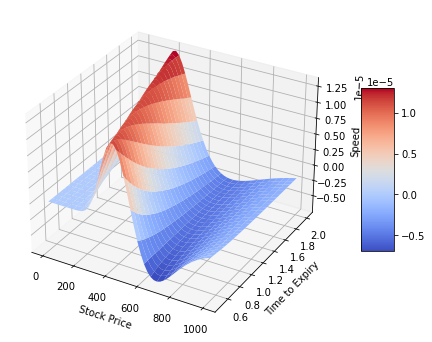

In [348]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Surface Of Theta

In [352]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [363]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 600, T[i], 0.0168, 0, 0.3487, 'call')

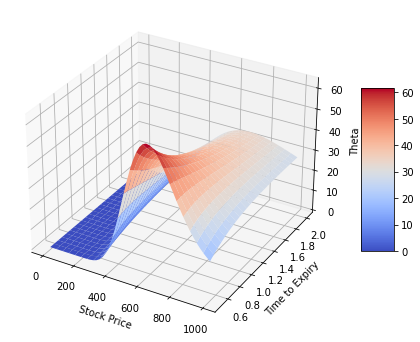

In [364]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Surface Of Rho

In [355]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [356]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 600, T[i], 0.0168, 0, 0.3487, 'call')

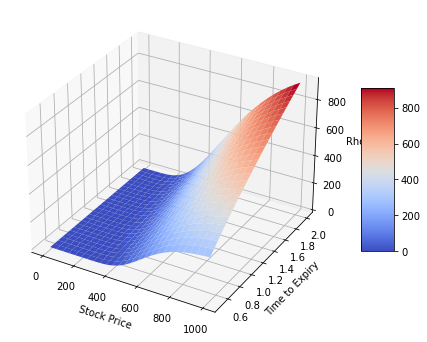

In [357]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Surface Of Vega

In [358]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [359]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 600, T[i], 0.0168, 0, 0.3487, 'call')

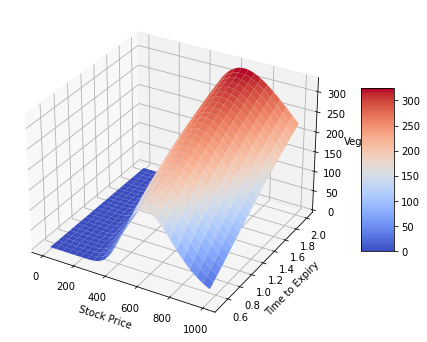

In [360]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);